# First Deep Learning Project
##Fashion Classification


### Train Neural Network on 60,000 Fashion-MNIST Images (data in NP array)



In [1]:
'''
class_labels:

0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot 

Classify the given input from above class using Neural Network

image shape 28 X 28 pixel ( Gray scale)

'''

'\nclass_labels:\n\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot \n\nClassify the given input from above class using Neural Network\n\nimage shape 28 X 28 pixel ( Gray scale)\n\n'

### Import Libraries

In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

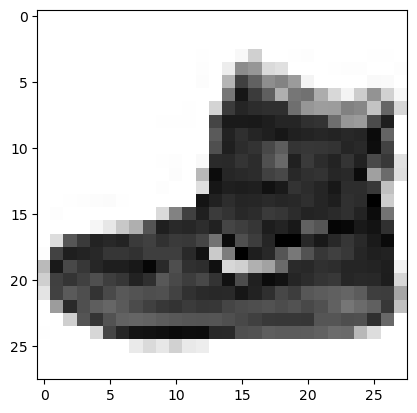

In [9]:
plt.imshow(X_train[0], cmap ="Greys")

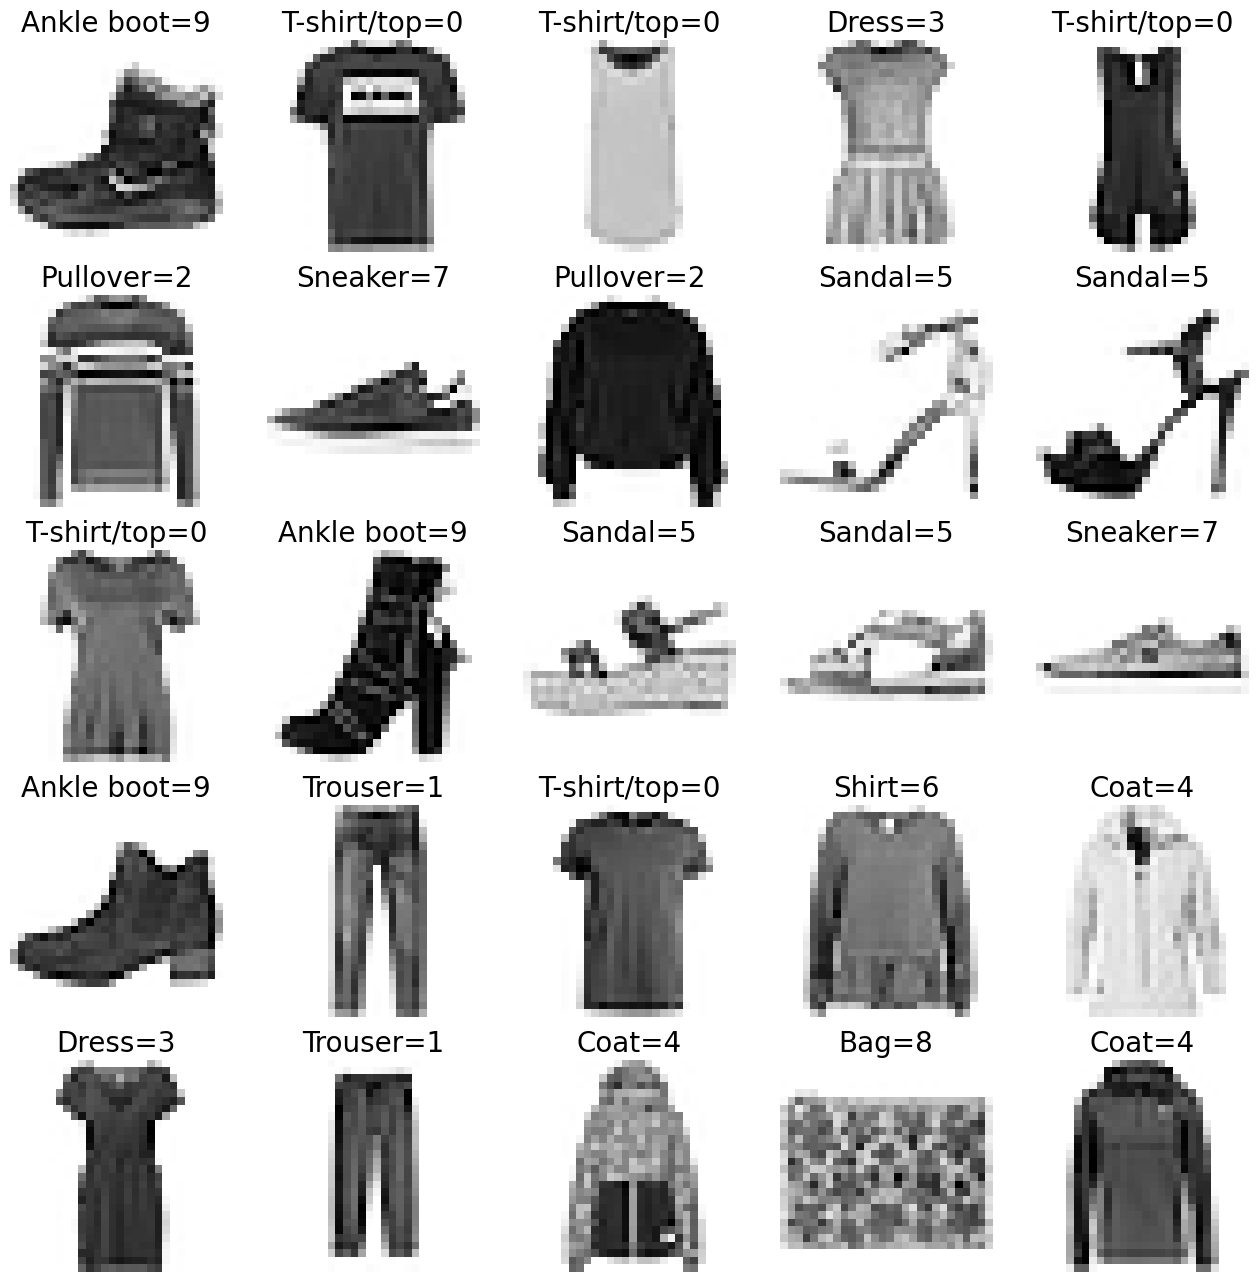

In [10]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

# Feature Scalling

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Build Neural Network

In [13]:
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=1)



1875/1875 [==============================] - 10s 4ms/step - loss: 0.5413 - accuracy: 0.8151


In [17]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4092 - accuracy: 0.8557
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3759 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3550 - accuracy: 0.8725
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.8784
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3279 - accuracy: 0.8809
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3169 - accuracy: 0.8850
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3090 - accuracy: 0.8883
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3004 - accuracy: 0.8904
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.8917
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.288

## Test and Evaluate Neural Network Model

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8619


[0.3892209827899933, 0.8618999719619751]

In [19]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
      dtype=float32)

In [21]:
np.argmax(y_pred[0].round(2))

9

In [22]:
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [23]:
y_test[0]

9

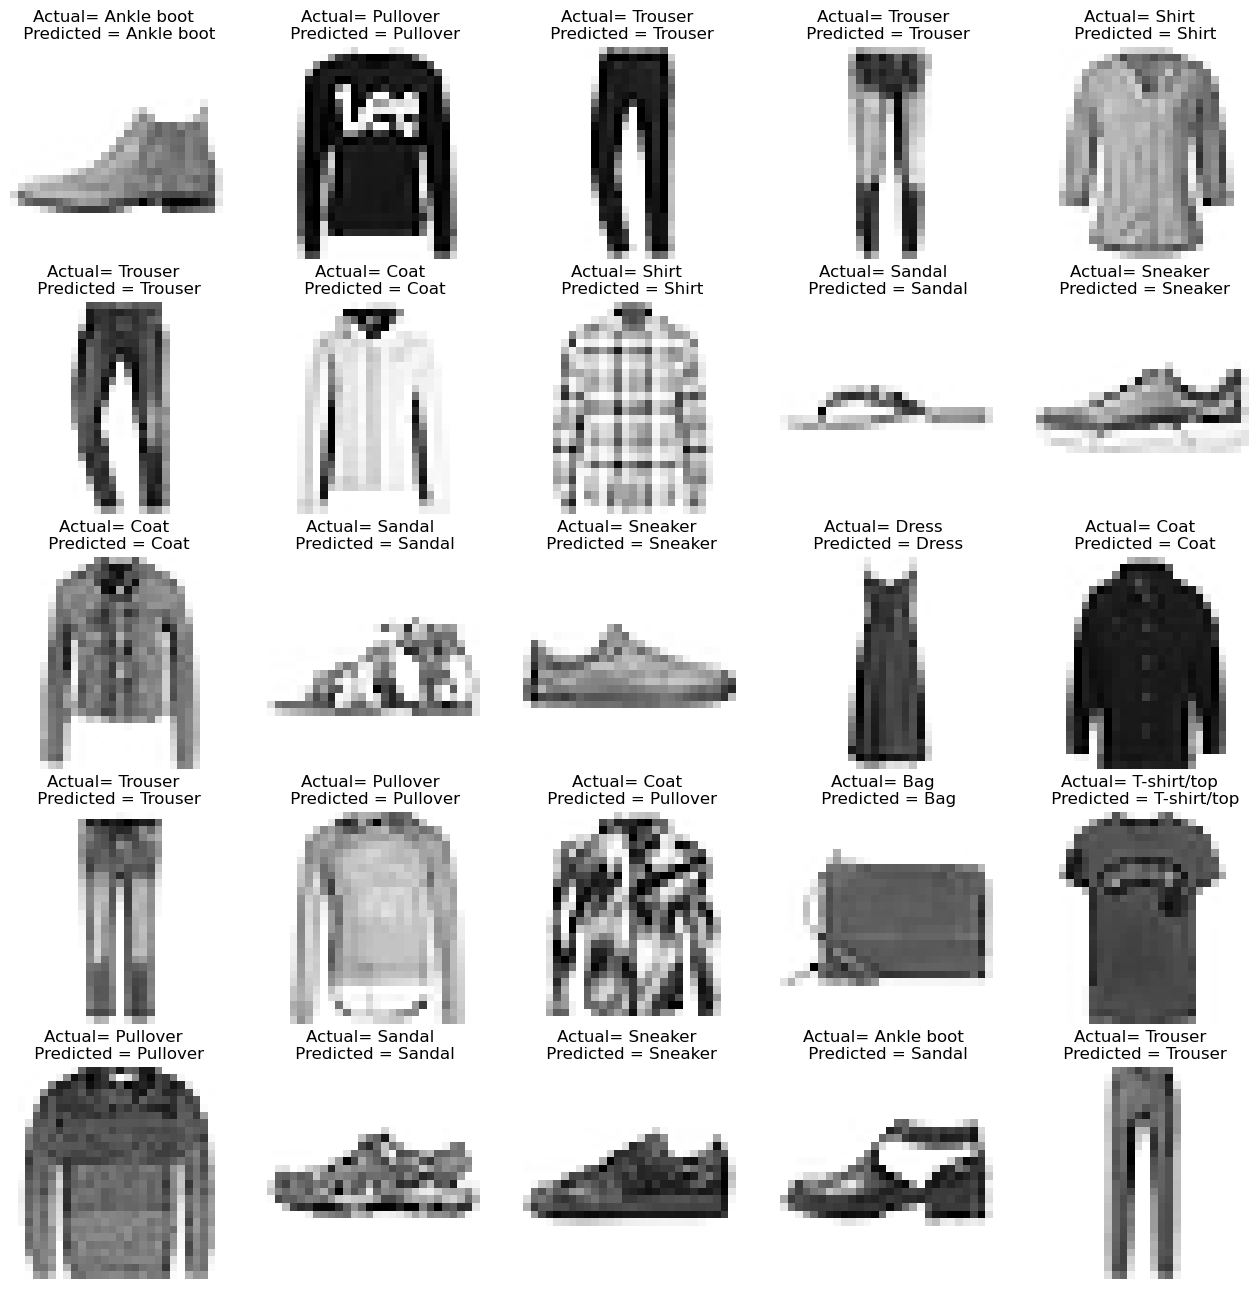

In [24]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

## Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

<AxesSubplot:>

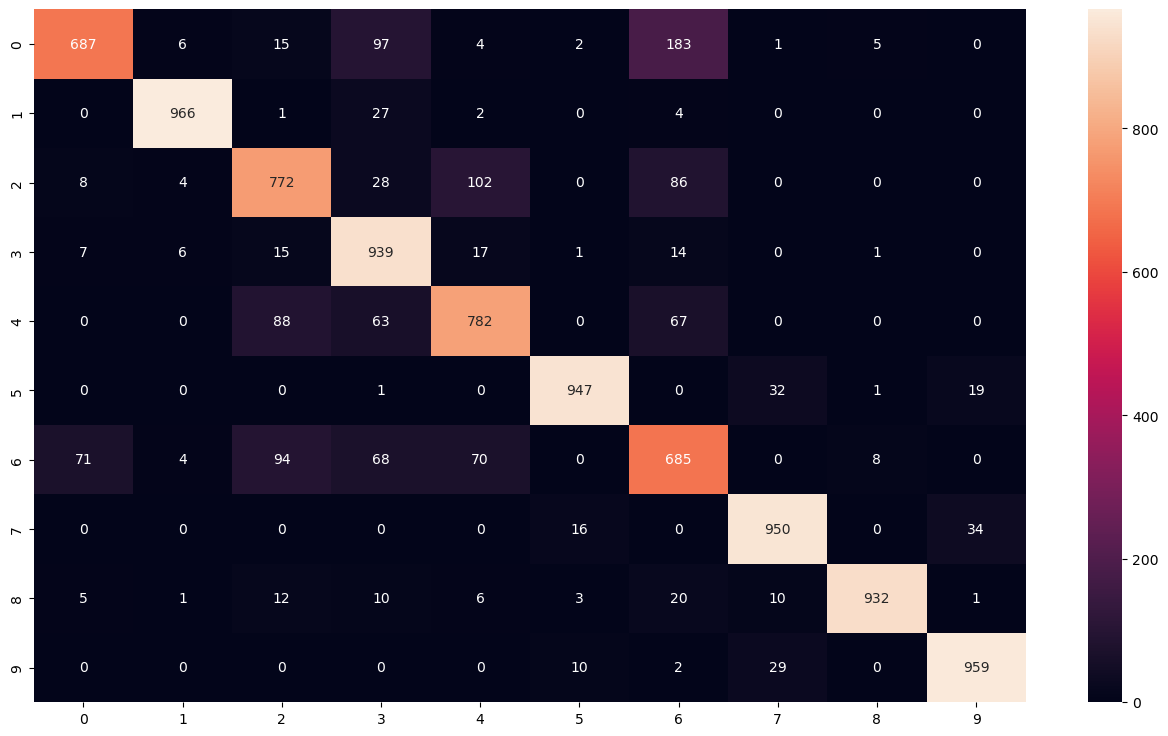

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

## Classification Report

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)

In [28]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.69      0.77      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.77      0.77      0.77      1000
       Dress       0.76      0.94      0.84      1000
        Coat       0.80      0.78      0.79      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.65      0.69      0.66      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.98      0.93      0.96      1000
  Ankle boot       0.95      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



## Save Model

In [29]:
model.save("MNIST_classifier_nn_model.h5")

C:\Users\KAUSHAL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")

In [31]:
model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


array([[8.3668247e-06, 9.5328717e-11, 1.5004595e-08, ..., 2.1945082e-02,
        1.0880251e-04, 9.7463006e-01],
       [6.6929047e-06, 1.4488619e-10, 9.8835200e-01, ..., 9.7505185e-13,
        4.6766826e-09, 4.0871863e-18],
       [9.5235771e-07, 9.9999654e-01, 2.0016635e-06, ..., 1.4606814e-11,
        1.1931400e-11, 1.3453316e-12],
       ...,
       [6.4631146e-03, 9.5045714e-08, 1.1713892e-03, ..., 3.1780086e-08,
        9.8337722e-01, 7.6974073e-11],
       [5.0104438e-07, 9.9953341e-01, 4.2949082e-06, ..., 1.4337914e-10,
        2.4038985e-10, 1.9352884e-11],
       [7.1986224e-06, 5.7637763e-08, 9.8285227e-07, ..., 1.1275284e-02,
        8.6513392e-06, 1.5267675e-05]], dtype=float32)

Ab milenge next tutorial me,Tab tak ke liye SIKHATE SIKHATE kuch IMPLEMENT karte raho, Thank You.....-:)
